In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
class MazeGenerator():
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.actions = np.array([[1,0],[-1,0],[0,1],[0,-1]], dtype=np.int8)
        self.inverse_action_map = np.array([1,0,3,2], dtype=np.int8)
        self.actions_np = np.array([[1,0],[-1,0],[0,1],[0,-1]], dtype=np.int8)
        self.inverse_action_map_np = np.array([1,0,3,2], dtype=np.int8)

    def get_neighbor(self, s, a):
        "s: (2,), a: (2,)"
        neigh = (s+a) % self.grid_size
        return neigh

    def walk_np(self, maze, visited, start_s, grid_size):
        " walk through the maze and remove walls in a depth-first manner "
        neighbors = np.array([self.get_neighbor(start_s, a) for a in self.actions])
        visited[start_s[0], start_s[1]] = 1
        random_order = np.random.permutation(len(neighbors))
        for i in random_order:
            neighbor = neighbors[i]
            if visited[neighbor[0], neighbor[1]] == 0:
                maze[start_s[0], start_s[1], i] = 0 # remove the wall
                maze[neighbor[0], neighbor[1], self.inverse_action_map[i]] = 0 # remove the inverse wall
                maze, visited = self.walk_np(maze, visited, neighbor, grid_size)
        return maze, visited
    
    def get_maze_np(self):
        "get a random maze"
        maze = np.ones((self.grid_size, self.grid_size, 4))
        visited = np.zeros((self.grid_size, self.grid_size), dtype=np.int8)
        start_s = np.random.randint(0, self.grid_size, 2)
        maze, visited = self.walk_np(maze, visited, start_s, self.grid_size) # remove walls
        extra_remove_n = 3*(self.grid_size-3) # remove extra walls
        wall_loc = np.where(maze == 1)
        remove_index = np.random.randint(0, wall_loc[0].shape[0], extra_remove_n, dtype=np.int8)
        for i in range(extra_remove_n):
            r, c, a = wall_loc[0][remove_index[i]], wall_loc[1][remove_index[i]], wall_loc[2][remove_index[i]]
            neighbor = self.get_neighbor(np.array([r,c]), self.actions[a])
            maze[r, c, a] = 0
            maze[neighbor[0], neighbor[1], self.inverse_action_map[a]] = 0
        return maze
    
    def render(self, wall_maze):
        fig, ax = plt.subplots(figsize=(3,3),frameon=True)
        ax.grid(visible=True)
        ax.set_xlim(0,self.grid_size)
        ax.set_ylim(self.grid_size,0)
        wall_loc = np.where(wall_maze==1)
        for i in range(len(wall_loc[0])):
            r, c, a = wall_loc[0][i], wall_loc[1][i], wall_loc[2][i] # already in matrix coordinates
            if a == 0:
                start_r = np.array([r+1, r+1])
                start_c = np.array([c, c+1])
            elif a == 1:
                start_r = np.array([r, r])
                start_c = np.array([c, c+1])
            elif a == 2:
                start_r = np.array([r, r+1])
                start_c = np.array([c+1, c+1])
            elif a == 3:
                start_r = np.array([r, r+1])
                start_c = np.array([c, c])
            line = mpl.lines.Line2D(start_c, start_r, color='blue', linewidth=5)
            ax.add_line(line)
        ax.xaxis.set_tick_params(bottom=False, top=True, labeltop=True, labelbottom=False)
        plt.show()

In [14]:
grid_size = 4
maze_gen = MazeGenerator(grid_size)

In [15]:
from tqdm import tqdm
n_maze = int(1e5)
maze_list = np.zeros((n_maze, grid_size, grid_size, 4))
for i in tqdm(range(n_maze)):
    maze_list[i] = maze_gen.get_maze_np()
np.save('maze_list.npy', maze_list)

100%|██████████| 100000/100000 [00:30<00:00, 3321.92it/s]


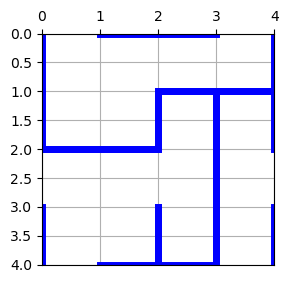

In [18]:
maze_list = np.load('maze_list.npy')
maze_gen.render(maze_list[342])

In [5]:
import jax
import jax.numpy as jnp
# wall_maze = maze_list[342]
n_agents = 16
grid_size = 4
wall_maze = jnp.zeros((n_agents, grid_size, grid_size, 4))
s = jnp.zeros((n_agents, 2), dtype=jnp.int8)
a = jnp.zeros((n_agents, 1), dtype=jnp.int8)
actions = jnp.array([[1,0],[-1,0],[0,1],[0,-1]], dtype=jnp.int8)
actions[a.reshape(-1)].shape
actions[a]

Array([[[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]],

       [[1, 0]]], dtype=int8)